# Центральная предельная теорема в действии

Демонстрируется справедливость одного из утверждений центральной предельной теоремы: из заданного исходного распределения генерируются выборки различного размера, вычисляется т.н. **выборочное среднее** по каждой выборке, которое, согласно этому утверждению, является нормально распределенной случайной величиной, причем параметры этого распределения можно рассчитать теоретически, зная параметры исходного распределения и размеры выборок.

Импортруем необходимые библиотеки:

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# plot sizes
w = 10
h = 10

## 1. Визуализация исходного распределения.

В качестве исходного распределения возьмем **экспоненциальное**. Из теории известно, что случайная величина имеет экспоненциальное распределние, если ее функция распределения имеет вид:
$$f_X(x) = \lambda \cdot e^{-\lambda x} ,\space x \geq 0 ,\space \lambda > 0 .$$

где $\lambda$ - параметр, который определяет, в частности мат.ожидание и дисперсию: 
$$\mu = \lambda, \space {\sigma}^2 = \frac{1}{\lambda^2}.$$
Для упрощения вычислений возьмем $  \lambda=\mu =\sigma=1.$


In [49]:
n = [] # массив, содержащий три разных размера выборок: 5, 50, 500
x = [] # массив из трех наборов выборок: 
        # x[0] содержит 1000 выборок длиной 5 элементов,
        # x[1] содержит 1000 выборок длиной 50 элементов,
        # x[2] содержит 1000 выборок длиной 500 элементов.

Сгенерируем 1000 выборок объемом n = 5, 50, 500 каждая. Для получения значения (реализации) случайной величины используем функцию **np.random.exponential()** с параметрами по умолчанию $  \lambda=\mu =\sigma=1.$

In [50]:
for k in [0,1,2]:
    size_of_sample = 5*(10**k)
    sample = [[np.random.exponential() for i in range (0, size_of_sample)] for j in range(0,1000)]
    x.append(sample)
    n.append(size_of_sample)

Далее для экспоненциальной случайной величины построим график теоритической функции распределения $f_X(x)$ с параметрами:
$$\lambda=\mu =\sigma=1.$$



In [51]:
interval = np.linspace(0,5,100) # создание интервала [0;5] для построения графика ф-ции плотности вероятности
exp_rv = sts.expon()            # зададим экспоненциально распределенную случайную величину с единичным параметром
pdf = exp_rv.pdf(interval) # генерируем значения ф-ции плотности вероятности данной величины на созданном интервале

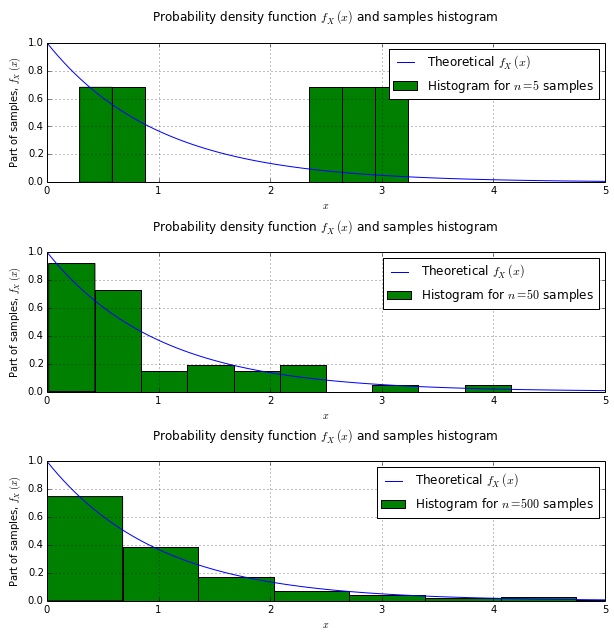

In [52]:
plt.figure(1)
plt.figure(figsize=(w, h))
# расстояние между графиками, чтобы подписи не "накладывались" друг на друга
plt.subplots_adjust(hspace=0.5)

for k in [0, 1, 2]:
    ax = plt.subplot(3,1,k+1)
    ax.set_xlim([0, 5.0])
    # построение нормированных гистограмм для каждой из выборок:
    plt.hist(x[k][10],normed=True, color='green',label="Histogram for $n=%s$ samples" % (n[k]) )
    # построение графика ф-ции плотности вероятности:
    plt.plot(interval, pdf, label='Theoretical $f_X(x)$') 
    
    # создание подписей к графикам и легенды
    plt.title("Probability density function $f_X(x)$ and samples histogram \n ")
    plt.ylabel('Part of samples, $f_X(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    plt.grid(True)

Из графиков хорошо видно, что с увеличением размера выборки гистограмма лучше приближает теоритическую функцию плотности вероятности.

## 2. Визуализация  распределения выборочного среднего.

Оценим распределение **выборочного среднего** экспоненциальной случайной величины при разных объёмах выборок (5, 50 и 500 элементов соответственно). Выборочным средним называется случайная величина 
$$ \overline{X_n} = \frac{1}{n}   \sum_{i=1}^n X_i $$
где 
$$ X_1,...,X_n -  выборка \space из \space распределения \space вероятности  $$

Воспользуемся одним из утверждениий ***центральной предельной теоремы о распределении выборочного среднего***: распределение суммы выборочных средних одинаково распределенных случайных величин **близко к нормальному**, т.е. 
$$ \overline{X_n} \sim N(\mu,\space\dfrac{\sigma^2}{n}) $$


Для каждого из трех наборов выборок сформируем набор выборочных средних sample_mean[ i ], каждый из которых будет содержать 1000 значений выборочных средних по каждой выборке.


Вычислим значения параметров трех нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних:

Для первого набора: $$n = 5:\lambda= \mu =\sigma=1$$
$$ \overline{X_5} \sim N(1,\space \dfrac{1}{5}) $$

Для второго набора: $$n = 50: \lambda= \mu =\sigma=1$$
$$ \overline{X_{50}} \sim N(1,\space \dfrac{1}{50}) $$

Для третьего набора: $$n = 500: \lambda=\mu =\sigma=1$$
$$ \overline{X_{500}} \sim N(1,\space\dfrac{1}{500}) $$


Создадим три нормальных случайных величины norm_rvs[ i ] , соответствующих этим распределениям.
Сгенерируем соответствующие им функции плотности вероятности pdfs[ i ] для того, чтобы в дальнейшем построить их графики.

In [53]:
sample_means = []  # набор выборочных средних
norm_rvs = []      # набор из трех нормальных случайных величин
pdfs = []          # набор функций плотностей вероятности из трех вышеуказанных нормальных случайных величин

In [54]:
# цикл по трем наборам: получаем выборочные средние
for k in [0, 1, 2]:
    # суммируются элементы каждой выборки из 1000, сумма делится на ее размер (5, 50 или 500),
    # получая таким образом из каждой выборки ее выборочное среднее
    sample_mean = [ sum(x[k][i])/n[k]  for i in range(0,1000)]
    sample_means.append(sample_mean)

Генерируем функции плотности вероятности:

In [55]:
# задаем интервал
interval = np.linspace(0.0,2.0,1000)
for k in [0, 1, 2]:
    # создаем случайную величину с рассчитанными выше параметрами
    norm_rv = sts.norm(loc=1, scale=math.sqrt(1.0/n[k]))
    # получаем массив значений ее функции плотности на заданном интервале
    pdf = norm_rv.pdf(interval)    
    
    pdfs.append(pdf)
    norm_rvs.append(norm_rv)

Наконец, для каждого из трех наборов полученных выборочных средних, построим в одних координатах гистограмму выборочных средних и соответствующую этой гистограмме теоритическую функцию плотности вероятности.

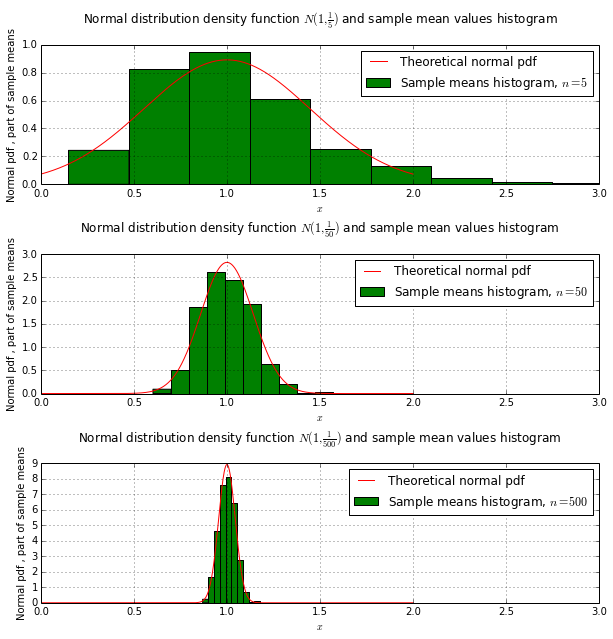

In [56]:
plt.figure(1)
plt.figure(figsize=(w, h))
plt.subplots_adjust(hspace=0.5)

for k in [0, 1, 2]:
    ax = plt.subplot(3,1,k+1)
    ax.set_xlim([0, 3.0])
    plt.hist(sample_means[k], normed=True, color='green', label='Sample means histogram, $n=%s$'%n[k])
    plt.title("Normal distribution density function $N(1,\\frac{1}{%s})$ and sample mean values histogram\n"%(n[k]))
    plt.plot(interval, pdfs[k], 'r', label='Theoretical normal pdf')
    plt.ylabel('Normal pdf , part of sample means')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    plt.grid(True)

Из графиков хорошо видно, что с увеличением размера выборки, случайная величина в виде выборочного среднего по этой выборке все лучше описывается нормальным распределением с соответствующими (рассчитанными теоретически) данной выборке параметрами. Причем, поскольку экспоненциальное распределение является несимметричным, при малых размерах выборки эта несимметричность легко заметна: правый "хвост" распределения длиннее левого, но более пологий, мода смещена немного левее относительно теоретического значения. С ростом размера выборки дисперсия уменьшается и выборочные средние сильнее концетрируются около мат.ожидания, что согласовывается с рассчетными значениями теоретических фукций плотностей.